# 1. Defining The Question.

### a) Specifying the Question





Use KNN classifier  to predict whether a passenger on the titanic ship died or survived.

### b) Defining the Metric for Success

The metric for success in this project will be a well fitted and fairly accurate KNN classifier that will optimumly predict if a passenger on the titanic died or survived with an accuracy score of above 80%

### c) Understanding the context

Royal Mail Ship (RMS) Titanic, was a British luxury passenger liner that sank on April 14th – 15th, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 passengers and ship personnel. One of the most famous tragedies in modern history and has been the subject of much scholarship and scientific speculation.

### d) Recording the Experimental Design

The following are the experimental design taken:

* Loading the dataset
* Exploratory Data Analysis
* Visualization
* Data Cleaning
* Features Engineering
* Modeling: K-Nearest Neighbors Classifier (KNN)
* Hyperparameter Tuning
* Optimization techinques for KNN

* Challenging the solution

### e) Data Relevance

The data to be used is a record of all passengers who were on the ship. It contains the names of passengers, the gender, number of sibling and parents the passengers had, port on which they embarked the ship and many other relevant details which will help create an optimal classification model.

# 2. Reading The Data.

In [1]:
#importing our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler        
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score              
from sklearn.metrics import classification_report




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading our data
titanic= pd.read_csv("/content/titanic.csv")

# 3. Checking The Data.

In [3]:
# Determining the no. of records in our datasets
titanic.shape

(891, 12)

In [4]:
# columns in our data set
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Previewing the top of our dataset
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# previewing the last observations of the data
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# checking for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The cabin column has so many null values hence we will drop it while the null values in age will be filled with the mean.Embarked will be filled with mode.

In [8]:
# checking for duplicates
titanic.duplicated().sum()

0

We have no duplicates.

In [9]:
# Checking whether each column has an appropriate datatype
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#Describing our data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

# 5. Tidying the Dataset

In [11]:
#Dealing with null values.
#filling the null values in  age with mean
titanic['Age']= titanic['Age'].fillna(titanic['Age'].mean(), axis = 0)
#drop unecessary columns such as cabin with a lot of null values
titanic.drop(['Cabin','Name','Ticket'], axis=1,inplace=True)
#checking there are null values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [12]:
# drop the null in embarked 
titanic=titanic.dropna()
#checking if we have no null values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

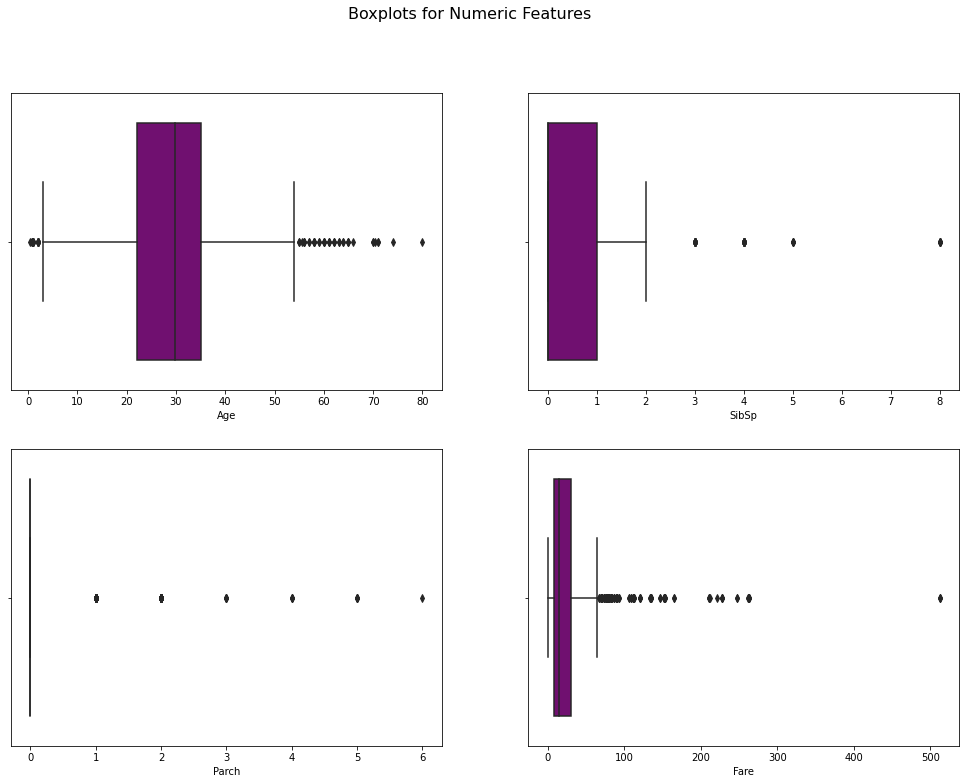

In [13]:
# Checking for outliers using boxplots

cols = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 12))
for ax, data, name in zip(axes.flatten(), titanic, cols):
  sns.boxplot(titanic[name], color = 'purple', ax = ax)
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

# 6. Exploratory Analysis

### Univariate Analysis

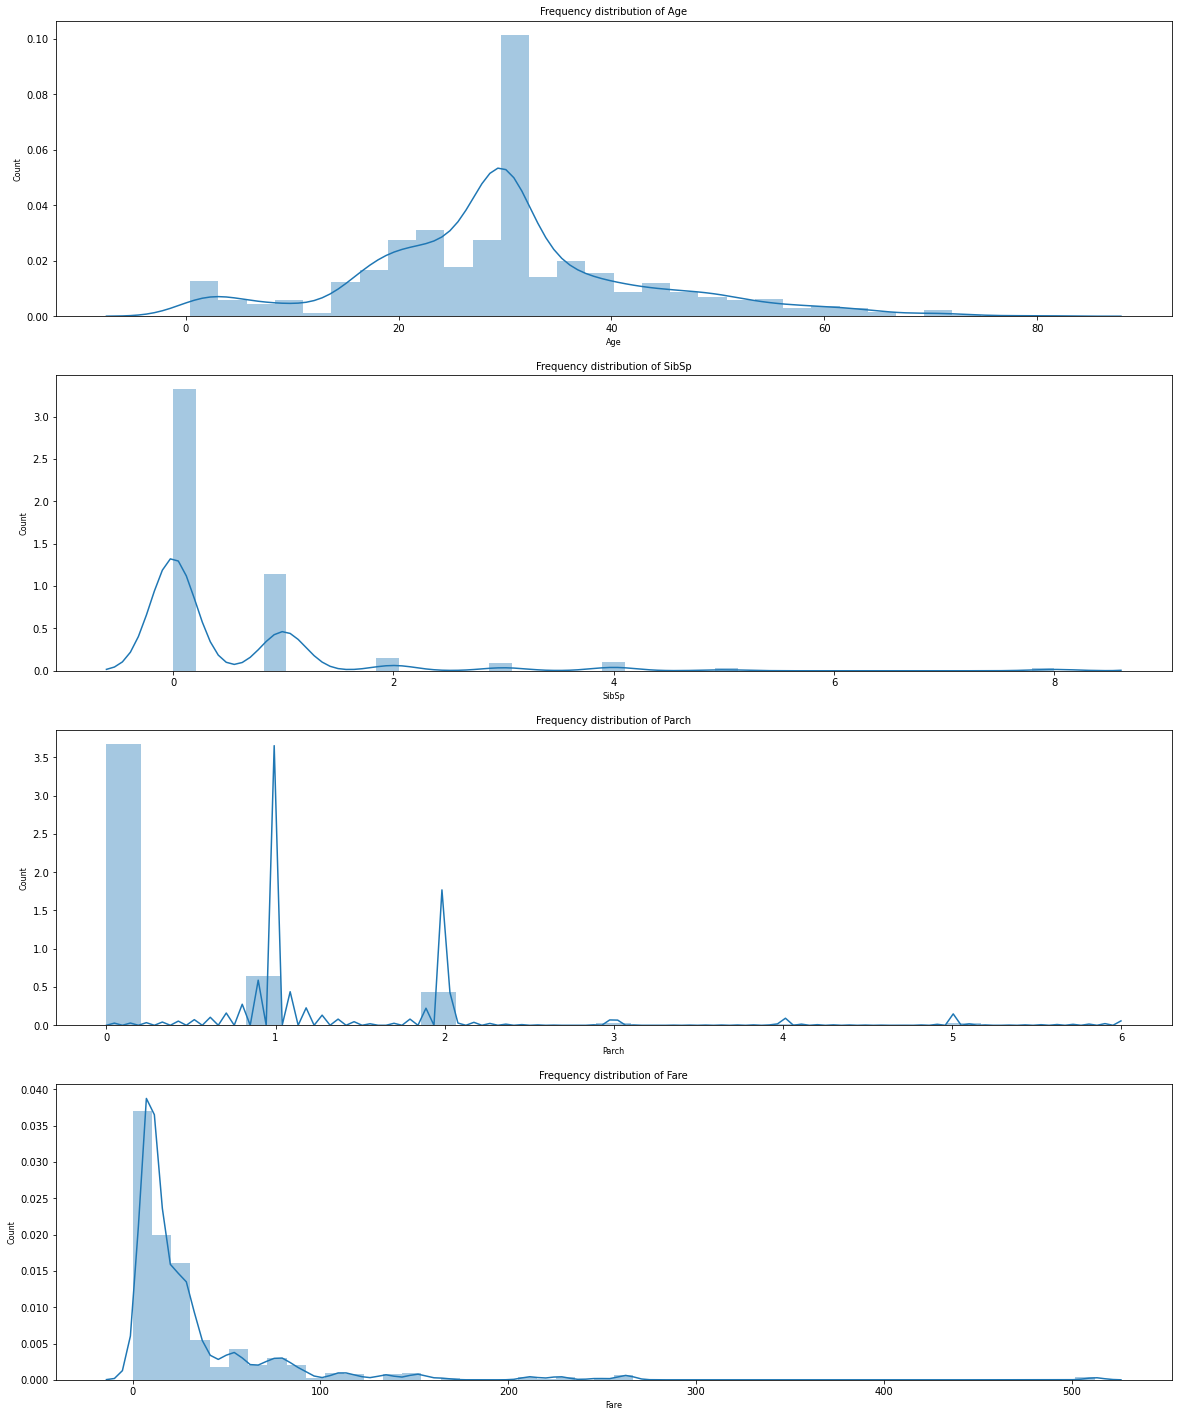

In [14]:
# distribution of numerical variables.

fig, ax = plt.subplots(len(cols), figsize=(20,25))

for i, col_val in enumerate(cols):

    sns.distplot(titanic[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()

Text(0.5, 0, 'Pclass')

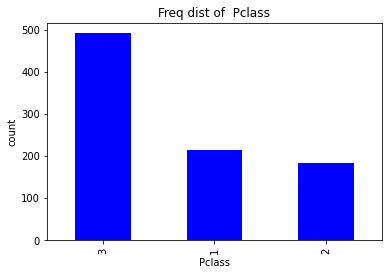

In [15]:
#Distribution of the Pclass
titanic['Pclass'].value_counts().plot.bar(title='Freq dist of  Pclass', color = 'blue')
plt.ylabel('count')
plt.xlabel('Pclass')

In [16]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

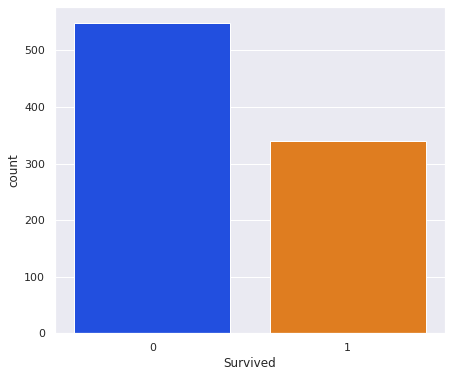

In [17]:
# frequency of the sex column
sns.set(rc={'figure.figsize':(7, 6)})
sns.set(style="darkgrid")
sns.countplot(x="Survived", data=titanic, palette='bright')

0= NO over 500 people did not survive.
1= Yes over 300 people survived

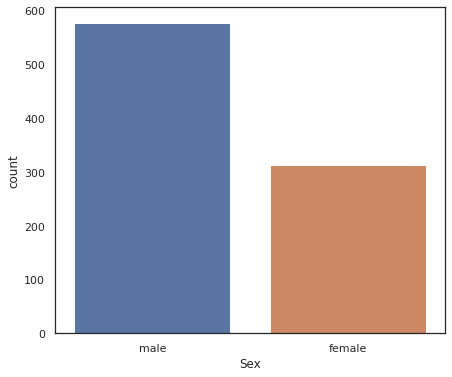

In [18]:
#  Checking the distribution of Sex column
# 
sns.set_style('white')
sns.countplot(x='Sex',data=titanic)

There are more males than females.

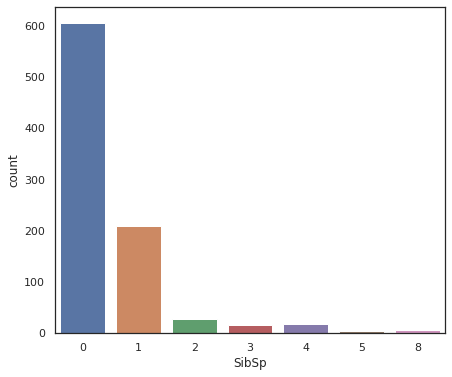

In [19]:
#  Visualizing the distribution of siblings or spouse
# 
sns.set_style('white')
sns.countplot(x='SibSp',data=titanic)

Most of the passengers did not have siblings or spouses

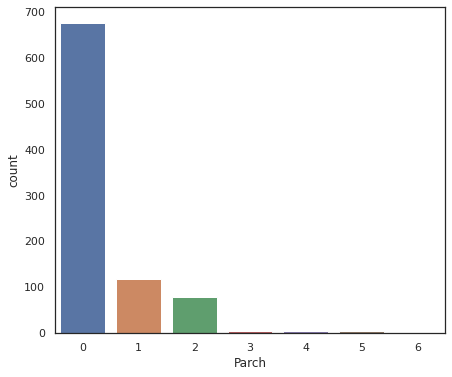

In [20]:
#  Visualizing the distribution of Parch
# 
sns.set_style('white')
sns.countplot(x='Parch',data=titanic)

### Bivariate Analysis

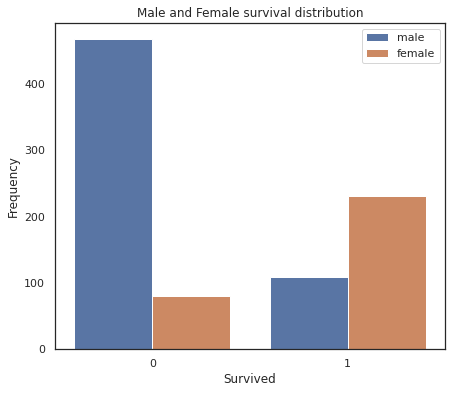

In [21]:
#Bar plot of sex vs Survived
ax = sns.countplot(x=titanic['Survived'], hue=titanic['Sex'],data=titanic,orient="h", alpha=1)
plt.title('Male and Female survival distribution')
plt.xlabel('Survived')
plt.xticks(rotation=0)
plt.legend(["male", "female"])
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Pclass')

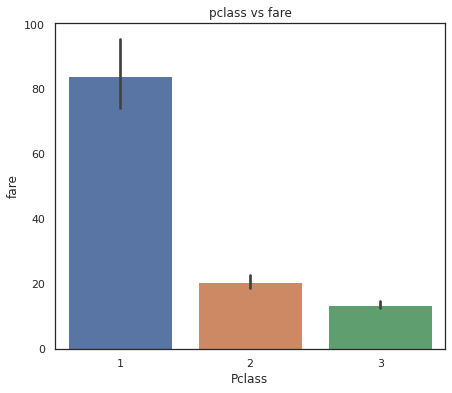

In [22]:
# barplot of Pclass and Fare
sns.barplot(x='Pclass',y='Fare',data = titanic)
plt.title('pclass vs fare')
plt.ylabel('fare')
plt.xlabel('Pclass')

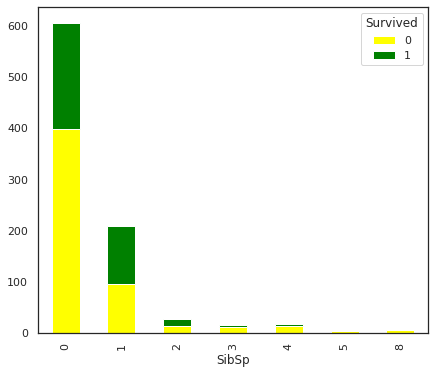

In [23]:
# Stacked bar graph of sibsp and their survival rate.
colors = ["yellow", "green"]
sns.set_palette(sns.color_palette(colors))
df = titanic.groupby(['Survived', 'SibSp'])['SibSp'].count().unstack('Survived').fillna(0)

df.plot(kind='bar', stacked=True, )

Those with no siblings and spouse survived more

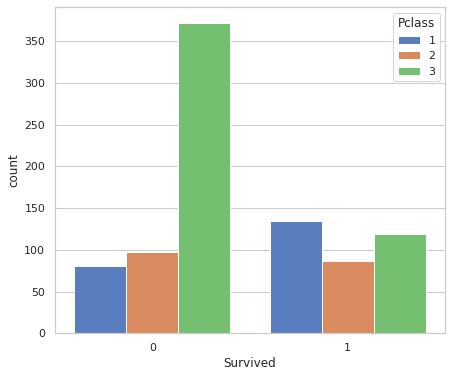

In [24]:
#  Comparing Survived column and Pclass column to understand who survided more,  and from which class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='muted')

Alot of passengers in 3rd class died while majority in first class survived.

### Feature Engineering

In [25]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [26]:
# Create a dictionary to manually encode the categorical data
dict_data = {"Sex": {"male": 1, "female": 0},
             'Embarked':{"S":0,'C':1, 'Q':3},
          
                }
titanic.replace(dict_data, inplace=True)

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


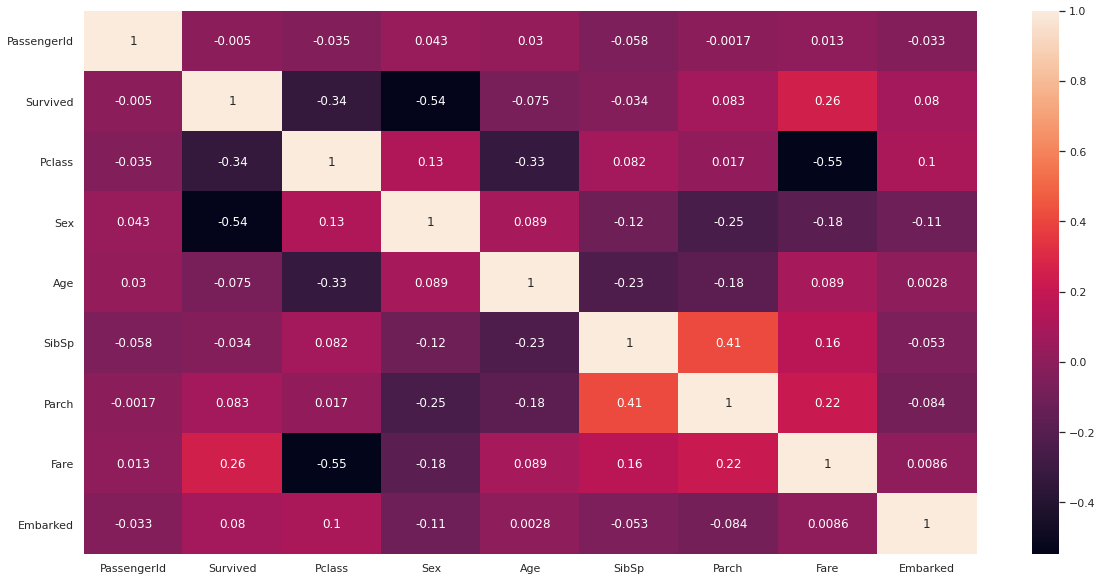

In [28]:

#visualizing the correlation between features
plt.figure(figsize=(20, 10))
corr = titanic.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

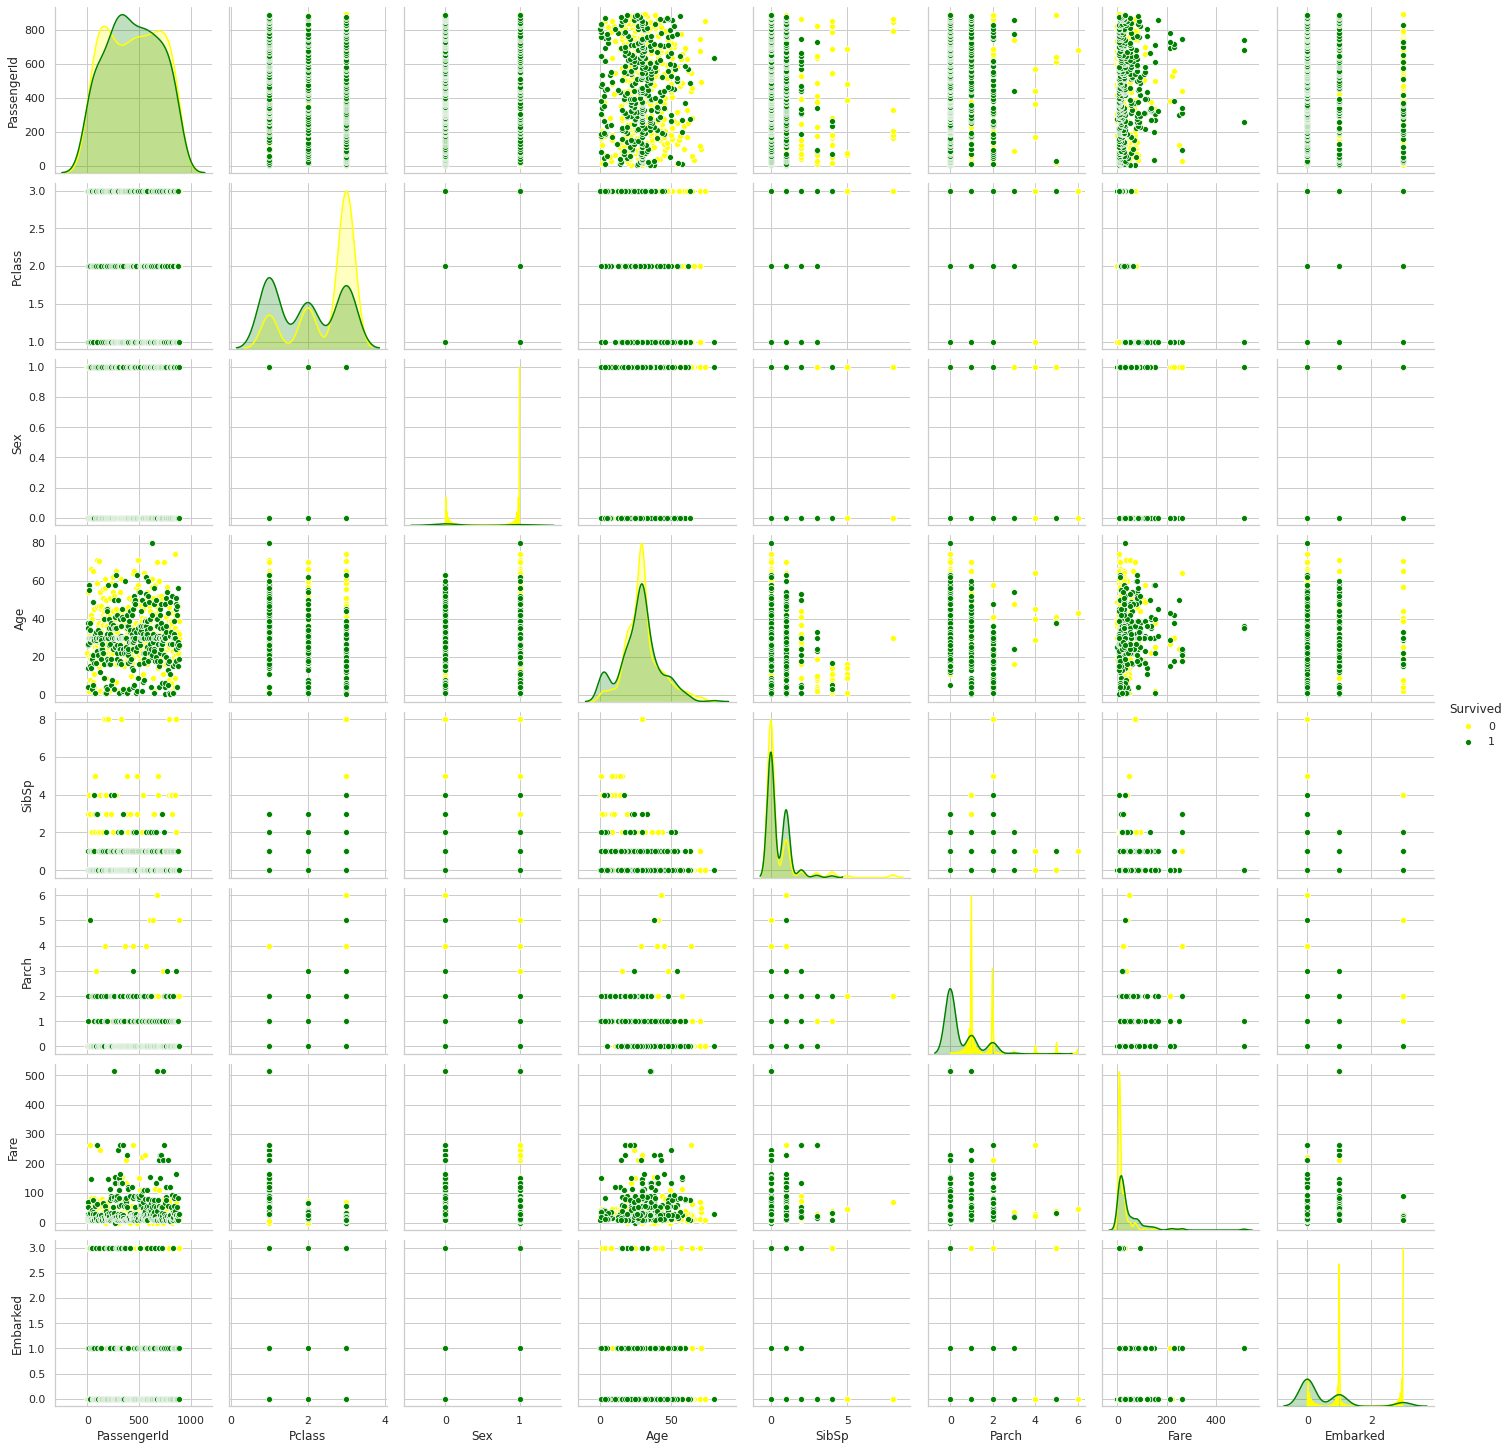

In [29]:
# Use of a pairplot to check for correlation between variables.

columns= ['PassengerId',  'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']

sns.pairplot(titanic, kind="scatter", diag_kind="kde", vars=columns, hue="Survived")
plt.show()

### Multivariate Analysis



> Linear Discriminant Analysis(LDA)



In [30]:
#Separating features and labels /preprocessing
X = titanic.drop(['Survived'], axis=1)
y = titanic["Survived"].values


In [31]:
#Split the data into a training set and testing set.



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [32]:
#Checking how many rows our train set has.
#We have 8 columns.
X_train.shape

(711, 8)

In [33]:
# Applying the LDA transformation.
# To use a specified number of components we can specify
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [34]:
X_train.shape

(711, 1)

# 7. Implementing the Solution

### K-nearest neighbor classification

In [35]:
#Normalisation


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
# Fit classifier 

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
#predicting test data
y_pred= classifier.predict(X_test)


In [38]:
# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       105
           1       0.66      0.58      0.61        73

    accuracy                           0.70       178
   macro avg       0.69      0.68      0.69       178
weighted avg       0.70      0.70      0.70       178

[[83 22]
 [31 42]]
The accuracy score of the model is : 0.702247191011236


In [39]:
# Splitting the data into train and test sets
# partitioning the data into 70-30 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the outcome

y_pred = clf.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69       157
           1       0.52      0.35      0.42       110

    accuracy                           0.60       267
   macro avg       0.58      0.56      0.56       267
weighted avg       0.58      0.60      0.58       267

[[121  36]
 [ 71  39]]
The accuracy score of the model is : 0.599250936329588


In [40]:
# Splitting the data into train and test sets
# partitioning the data into 60-40 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the outcome

y_pred = clf.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       216
           1       0.53      0.34      0.42       140

    accuracy                           0.62       356
   macro avg       0.59      0.57      0.57       356
weighted avg       0.60      0.62      0.60       356

[[173  43]
 [ 92  48]]
The accuracy score of the model is : 0.6207865168539326


### Improving the model performance

In [41]:
#hyper-parameter tune our model to improve accuracy. We will use the grid search.

param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree', 'brute'] }
clf = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10 ,n_jobs= 1, verbose  = 0)
print('best parameters:', clf.fit(X_train,y_train))

best parameters: GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [42]:
#fittting our model with the best parameters
clf2 = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', leaf_size = 30,metric='minkowski',weights='uniform' )
clf2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
#predicting the results.
y_pred = clf.predict(X_test)

#assessing the accuracy of the model
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.6432584269662921


## Conclusion

The best accuracy score was 70% where we split the data 80-20% and an f1 score of 0.70. This accuracy did not improve rather it reduced when we fitted the best parameters hence we would just go with the accuracy of 70% unless we challenge our solution further.

# Challenging the Solution.

Random Forest

In [44]:
#Using Random Forest which is an Ensemble algorithm
# Instantiating our model
# Training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=10,
                                       n_jobs=-1) 
random_forest.fit(X_train, y_train)

# Making predictions
Y_prediction = random_forest.predict(X_test)

# Evaluating the model
random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

# Generating cross-validated estimates for each input data point
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)


print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

91.93 %
[[303  30]
 [ 60 140]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       333
           1       0.82      0.70      0.76       200

    accuracy                           0.83       533
   macro avg       0.83      0.80      0.81       533
weighted avg       0.83      0.83      0.83       533



## Recommendations

The random forest model has performed best compared to our KNN model which is a lazy learner. With an accuracy of 91.93%. I would recommend we use the random forest model for this challenge so as to get the best predictions.

# 9. Follow up questions

### a). Did we have the right data?

My data was absolutely right to answer the prediction question

### b). Do we need other data to answer our question?

Yes , more informatives features would have boosted our predictions.There were also several instances of overfitting

### c). Did we have the right question?

The question was right the data given was not enough to answer them accurately. Probably further assessing and hyperparameter tuning of the models would improve the model and have even a higher accuracy score.